# Plot results

In [1]:
import os, json
import matplotlib.pyplot as plt
import numpy as np

In [27]:
exp_folder = "./../zoo/test2/saxe2018iclr/mnist/fcn/20200421011240/"

In [28]:
config_file = os.path.join(exp_folder, "config.json")
config = {}
with open(config_file, "r") as f:
    config = json.load(f)

In [29]:
epochs_run = 0
with open(os.path.join(exp_folder, "stats.json"), "r") as f:
    epochs_run = json.load(f)['epoch']

In [30]:
metrics = {}
with open(os.path.join(exp_folder, "metrics.json"), "r") as f:
    metrics = json.load(f)

In [31]:
log_file = os.path.join(exp_folder, "mi_data.json")
mi_data = {}
with open(log_file, "r") as f:
    mi_data = json.load(f)

/opt/Miniconda2/envs/tf-2.1-generic/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/opt/Miniconda2/envs/tf-2.1-generic/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


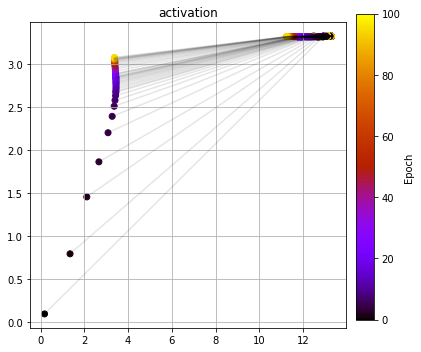

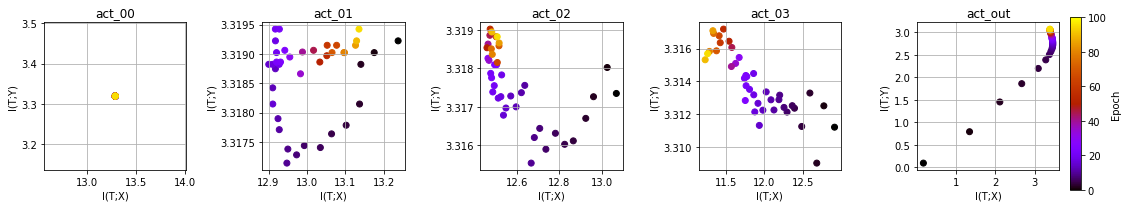

In [32]:
sm = plt.cm.ScalarMappable(cmap='gnuplot', norm=plt.Normalize(vmin=0, vmax=config['epochs']))
sm._A = []

# plot infoplane evolution
n_layer_types = len(mi_data)
fig, ax = plt.subplots(nrows=1, ncols=n_layer_types, figsize=(5*n_layer_types, 5))
if n_layer_types == 1:
    ax = [ax]
ax = dict(zip(mi_data.keys(), ax))
for layer_type, layer_data in mi_data.items():
    for layer_name, mi_values in layer_data.items():
        c = [sm.to_rgba(int(epoch)) for epoch in mi_values.keys()]
        
        mi = np.stack([mi_val for (_, mi_val) in mi_values.items()])
        ax[layer_type].scatter(mi[:,0], mi[:,1], c=c)
        
    epochs = list(layer_data[next(iter(layer_data))].keys())
    for epoch_idx in epochs:
        x_data = []
        y_data = []
        for layer_name, mi_values in layer_data.items():
            x_data.append(mi_values[epoch_idx][0])
            y_data.append(mi_values[epoch_idx][1])
        ax[layer_type].plot(x_data, y_data, c='k', alpha=0.1)
    
    ax[layer_type].set_title(layer_type)
    ax[layer_type].grid()
        
cbaxes = fig.add_axes([1.0, 0.10, 0.05, 0.85])
plt.colorbar(sm, label='Epoch', cax=cbaxes)
plt.tight_layout()

# plot layerwise
for layer_type, layer_data in  mi_data.items():
    if layer_data:
        n_layers = len(layer_data)
        fig, ax = plt.subplots(nrows=1, ncols=n_layers, figsize=(3*n_layers, 3))
        ax = dict(zip(layer_data.keys(), ax))
        for (layer_name, mi_values) in  layer_data.items():
            c = [sm.to_rgba(int(epoch)) for epoch in mi_values.keys()]
            
            mi = np.stack([mi_val for (_, mi_val) in mi_values.items()])
            ax[layer_name].scatter(mi[:,0], mi[:,1], c=c)
            ax[layer_name].set_title(layer_name)
            ax[layer_name].set_xlabel("I(T;X)")
            ax[layer_name].set_ylabel("I(T;Y)")
            ax[layer_name].grid()
        cbaxes = fig.add_axes([1.0, 0.1, 0.01, 0.80])
        plt.colorbar(sm, label='Epoch', cax=cbaxes)
        plt.tight_layout()

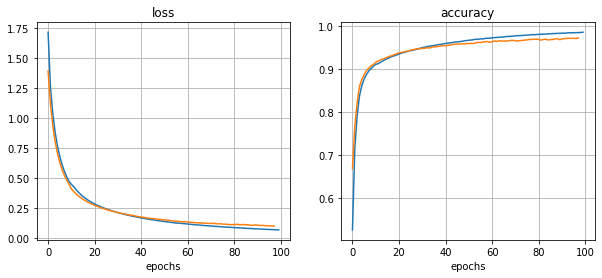

In [37]:
epochs = metrics['epoch']
metric_labels = [label for label in metrics.keys() if label != 'epoch' and not label.startswith("val_")]

fig, ax = plt.subplots(nrows=1, ncols=len(metric_labels), figsize=(5*len(metric_labels), 4))
if len(ax) == 1:
    ax = [ax]
ax = dict(zip(metric_labels, ax))
for label in metric_labels:
    ax[label].plot(epochs, metrics[label])
    if "val_"+label in metrics:
        ax[label].plot(metrics["val_"+label])
    
    ax[label].set_xlabel('epochs')
    ax[label].set_title(label)
    ax[label].grid()

In [36]:
len(metrics['epoch'])

100